**PROBLEM STATEMENT for K-NN:**

The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for PD.  Dataset can be downloaded from below link.

https://archive.ics.uci.edu/ml/datasets/parkinsons

Create classification model using KNN.  Identify the optimum no of neighbors and dimensions for your model.

Justify if KNN model should be considered or not for the problem statement.

evaluation will be based on..

1)  Handling of missing values, outliers, if any .

2)  Identifying data and model issues if any.

3) Choice of packages and distance measure used. justify your answer.

4) Selection of train, test split.

5) Final model creation and accuracy matrix selected for the model.

6) Future scope of the work.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
data =  pd.read_csv('parkinsons.data', sep=",")

### Examining the dataset

In [127]:
#data shape 
print(f'Shape of the dataset {data.shape}')

Shape of the dataset (195, 24)


In [128]:
#columns in dataset
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [129]:
pd.set_option('max_columns', 25)
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [130]:
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### Descriptive Statistics

In [131]:
# descriptive statistics for numerical columns
data.describe().style.background_gradient(cmap = 'copper')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


It is clearly shown that most of the featurs have no outlies in the dataset, but we are suspencting 3 feature ('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'). So let's plot these 3 features and check for outliers in it

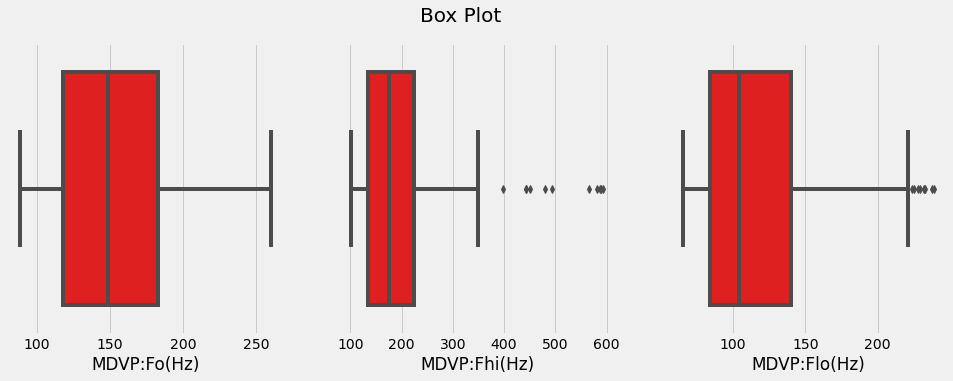

In [132]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')


plt.subplot(1, 3, 1)
sns.boxplot(data['MDVP:Fo(Hz)'], color = 'red')


plt.subplot(1, 3, 2)
sns.boxplot(data['MDVP:Fhi(Hz)'], color = 'red')

plt.subplot(1, 3, 3)
sns.boxplot(data['MDVP:Flo(Hz)'], color = 'red')

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

These 3 box plots showing that the feature "MDVP:Fo(Hz)" have no outliers 

In the feature "MDVP:Flo(Hz)", we can see some points after the Max Value, which can be termed to be as Outliers. We do not need to remove these values, as the values are not very far and Huge.

In the feature "MDVP:Fhi(Hz)", we can see some noticable outliers. So let's remove those from the dataset

In [133]:
data = data[data['MDVP:Fhi(Hz)'] < 336]

In [134]:
# descriptive statistics for catagorical column
data.describe(include = 'object')

,name
count,183
unique,183
top,phon_R01_S10_4
freq,1


It is clearly shown that the "name" column have 100% uniquness. So it'll not going to contribute much for building the model.

In [135]:
data.drop('name', axis=1, inplace = True)

### Missing value Treatment

In [136]:
data.isna().mean().round(4)*100

MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64

We can clearly see from the result that we have no missing values in our dataset

### Duplicates checker

In [137]:
print(f'Number of duplicate rows = {data.duplicated().sum()}')

Number of duplicate rows = 0


It's clear that we have no duplicate records in our data

### Target feature analysis

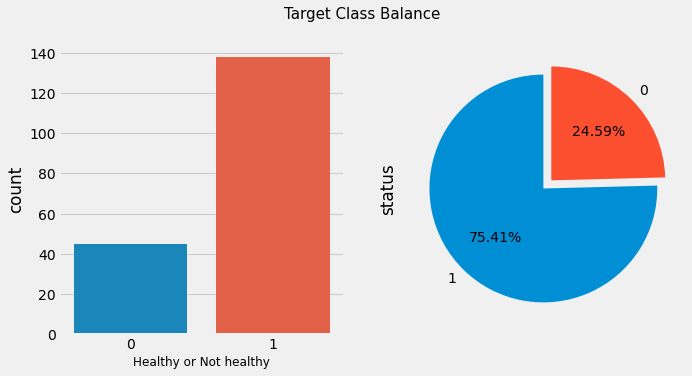

In [138]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(data['status'])

plt.xlabel('Healthy or Not healthy', fontsize = 12)

plt.subplot(1, 2, 2)
data['status'].value_counts().plot(kind = 'pie', explode = [0, 0.1], 
                                   autopct = '%.2f%%', startangle = 90, labels = ['1','0'])

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

We can easily see a high imbalance in target feature "status" and the classes in target feature have to be balanced.  We'll have very low results, which'll totally biassed in relation to class with a higher distribution, when we use machine learning models with imbalanced data.

### Data description

* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

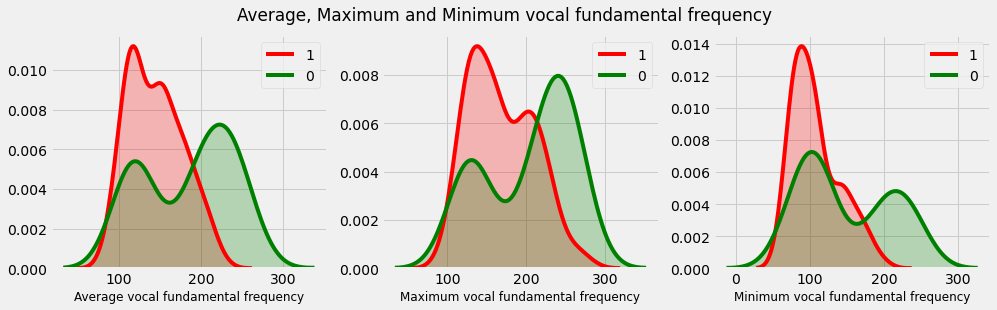

In [139]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.subplot(131)
sns.kdeplot(data.loc[(data['status']==1), 'MDVP:Fo(Hz)'], color='r', shade=True, Label='1')
sns.kdeplot(data.loc[(data['status']==0), 'MDVP:Fo(Hz)'], color='g', shade=True, Label='0')
plt.xlabel('Average vocal fundamental frequency', fontsize=12)

plt.subplot(132)
sns.kdeplot(data.loc[(data['status']==1), 'MDVP:Fhi(Hz)'], color='r', shade=True, Label='1')
sns.kdeplot(data.loc[(data['status']==0), 'MDVP:Fhi(Hz)'], color='g', shade=True, Label='0')
plt.xlabel('Maximum vocal fundamental frequency', fontsize=12)

plt.subplot(133)
sns.kdeplot(data.loc[(data['status']==1), 'MDVP:Flo(Hz)'], color='r', shade=True, Label='1')
sns.kdeplot(data.loc[(data['status']==0), 'MDVP:Flo(Hz)'], color='g', shade=True, Label='0')
plt.xlabel('Minimum vocal fundamental frequency', fontsize=12)

plt.suptitle('Average, Maximum and Minimum vocal fundamental frequency')
plt.show()

from this graphs we can see that vocal frequency for healthy people is genaraly between 100 to 300. But for the Parkinson people most of the records are between 100 to 200 only

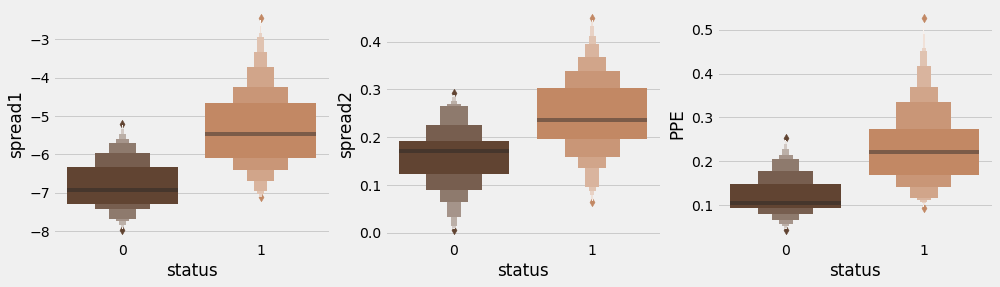

In [140]:
plt.rcParams['figure.figsize'] = (15,4)
plt.subplot(131)
sns.boxenplot(data['status'], data['spread1'], palette = 'copper')

plt.subplot(132)
sns.boxenplot(data['status'], data['spread2'], palette = 'copper')

plt.subplot(133)
sns.boxenplot(data['status'], data['PPE'], palette = 'copper')

plt.show()

It clearly shown that nonlinear measures of fundamental frequency variation of healthy people is always lower than the parkinson affected people

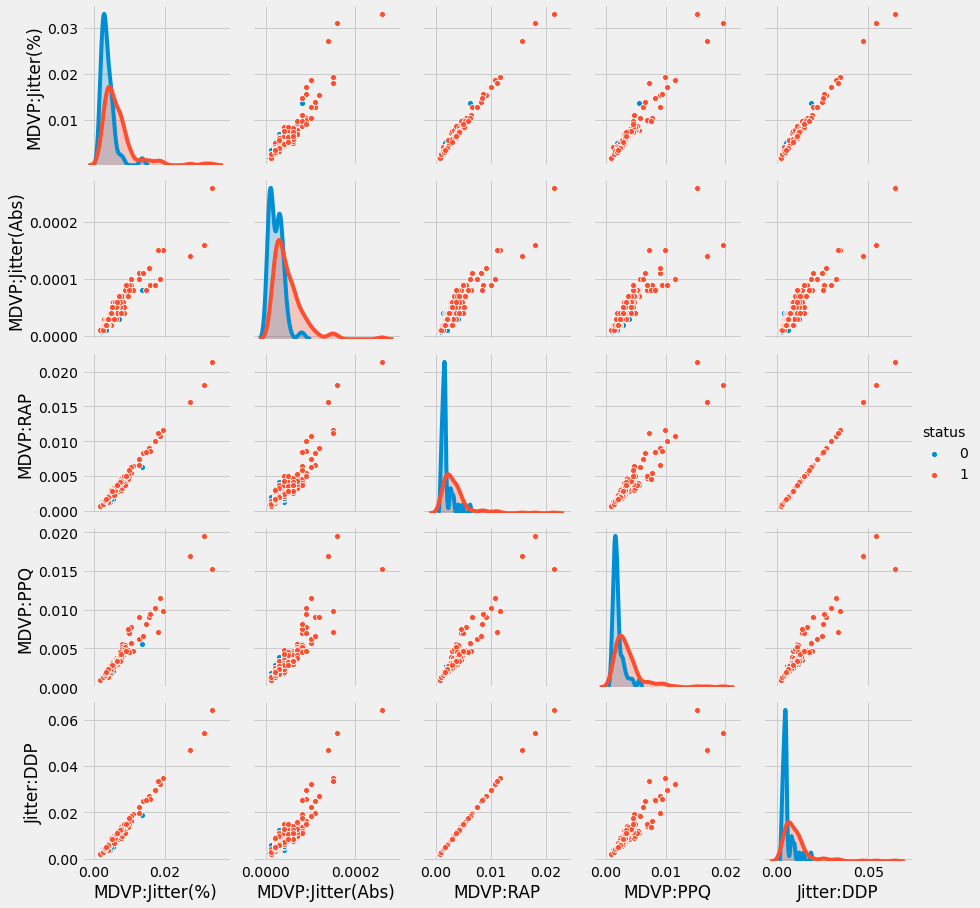

In [141]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(data,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

From the above pair plot we can understand that all these fundamental frequencies are highly correlated with eachother.

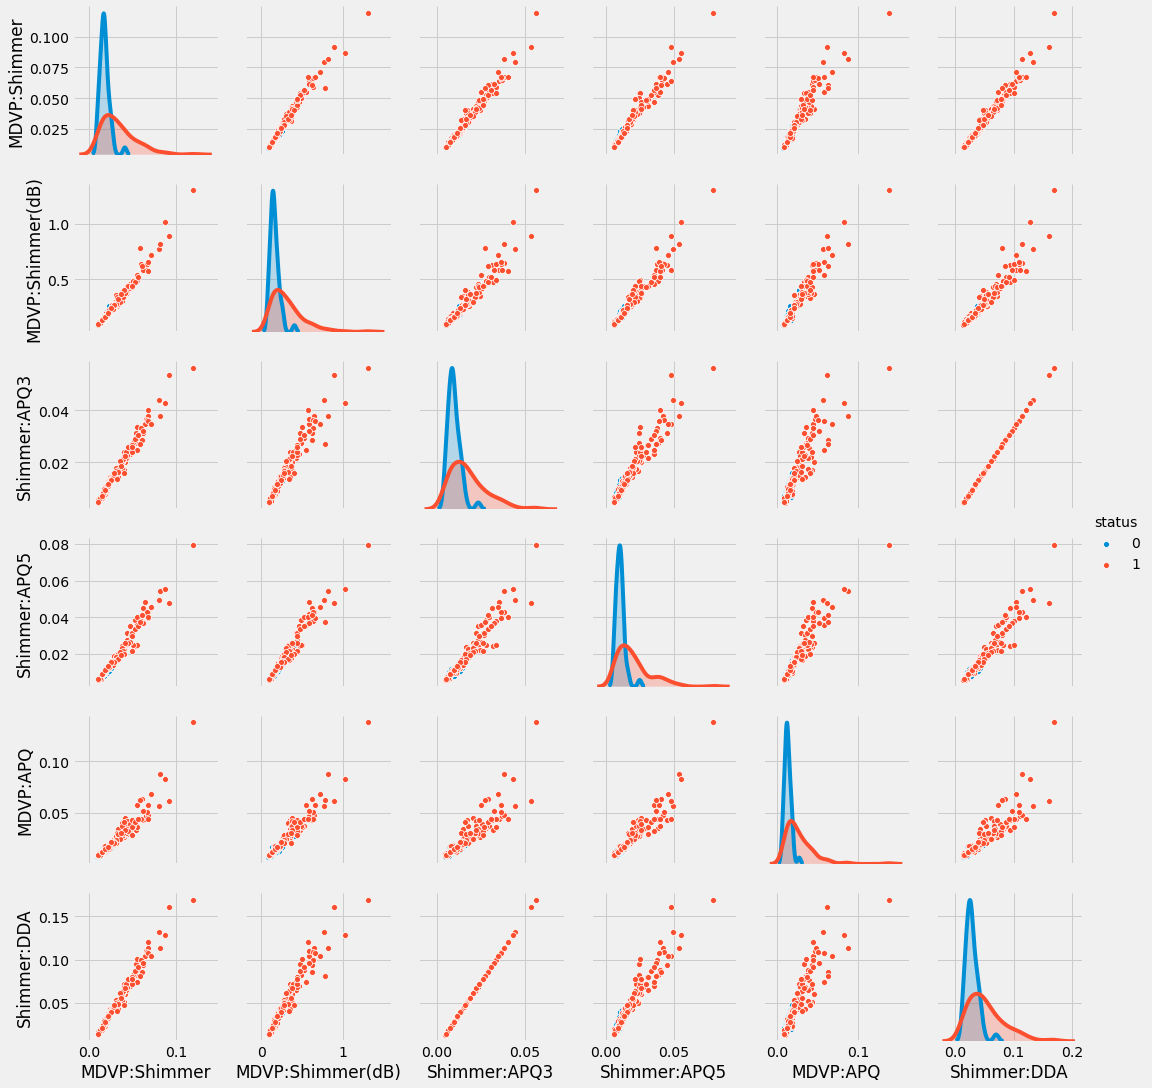

In [142]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(data,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()


From the above pair plot we can understand that all these measures variation in amplitude are highly correlated with eachother.

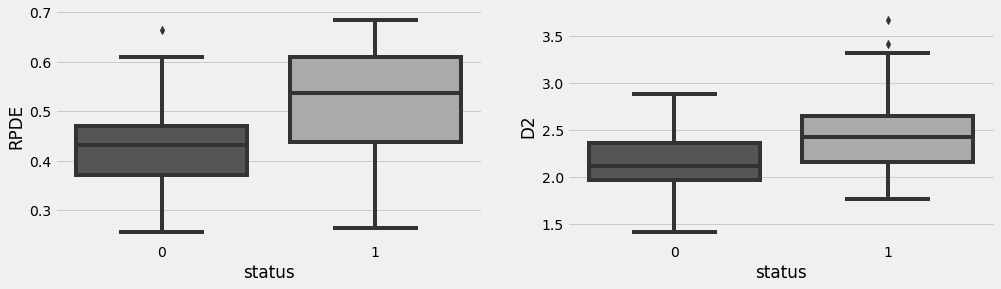

In [143]:
plt.rcParams['figure.figsize'] = (15,4)
plt.subplot(121)
sns.boxplot(data['status'], data['RPDE'], palette = 'gray')

plt.subplot(122)
sns.boxplot(data['status'], data['D2'], palette = 'gray')

plt.show()

### Feature Selection

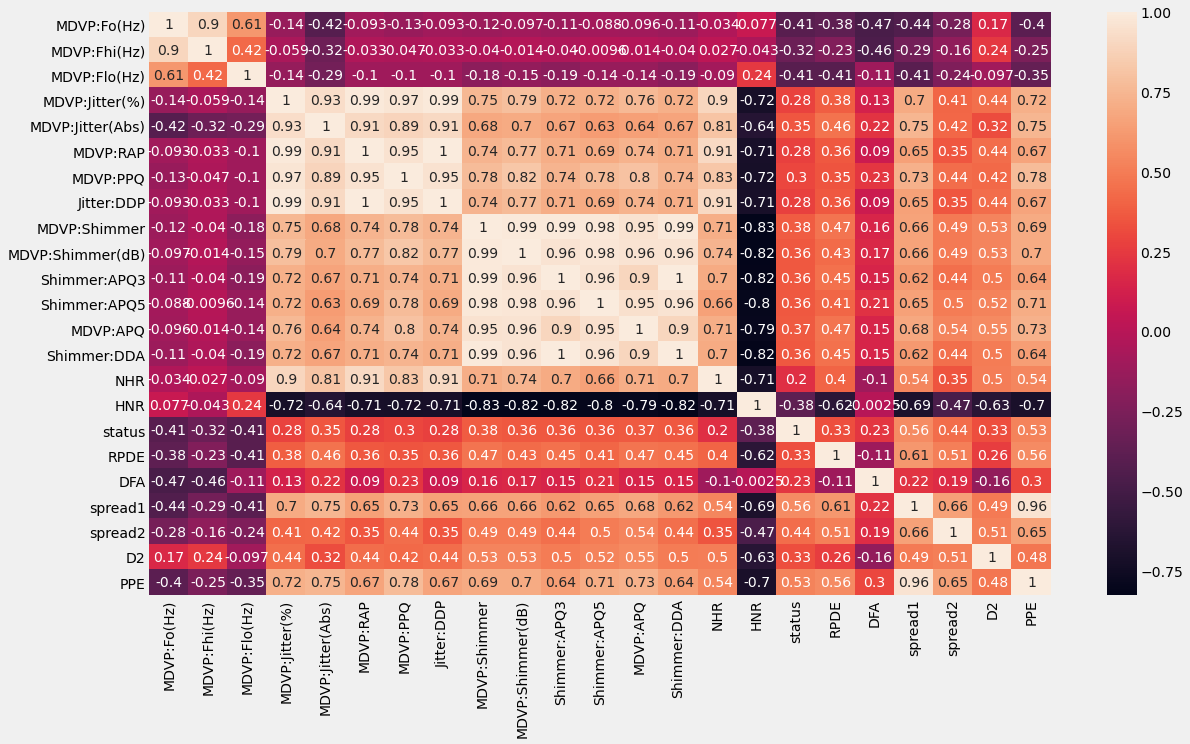

In [144]:
plt.rcParams['figure.figsize']=18,10

sns.heatmap(data.corr(), annot=True)

* In this correlation heatmap, we can see that many independent features are highly correlated with eachother. So, to omit multicolinearity let's work on features. 

### Feature Selection using Boruta

* Boruta can be used on any tree based models
* it creates new shadow features for every orginal features. 
* Shadow feature means randomly select some feature and shuffle it's values and creating new feature with it
* It will train and calculate the importance of the features.
* If orginal feature performed better than it's shadow feature, then it will mark it as important feature or else it will not

In [145]:
x=data.drop('status', axis=1)
y=data['status']

from xgboost import XGBClassifier
from boruta import BorutaPy

model=XGBClassifier()

boruta = BorutaPy(estimator=model, n_estimators = 'auto',
                 max_iter = 100, random_state = 0)

boruta.fit(np.array(x), np.array(y))

best_features = x.columns[boruta.support_].to_list()
print(best_features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['MDVP:Fo(Hz)', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'HNR', 'spread1', 'PPE']


In [146]:
data_copy = data.copy()
data = data[['MDVP:Fo(Hz)', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'HNR', 'spread1', 'PPE', 'status']]

### Imbalance treatment

In [147]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(data.iloc[:,:-1], data['status'])

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(276, 6)
(276,)


In [148]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
print(np.bincount(y_resample))

Before Resampling :
1    138
0     45
Name: status, dtype: int64
After Resampling :


<IPython.core.display.Javascript object>

[138 138]


### Data splitting

In [149]:
from sklearn.model_selection import train_test_split
#train and test data 
X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.23, random_state=42)

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

# KNN Model building 

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
#let's find optimized n_neighbour value

error_rate = []
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scl,y_train)
    pred_i = knn.predict(X_test_scl)
    error_rate.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Error Rate')

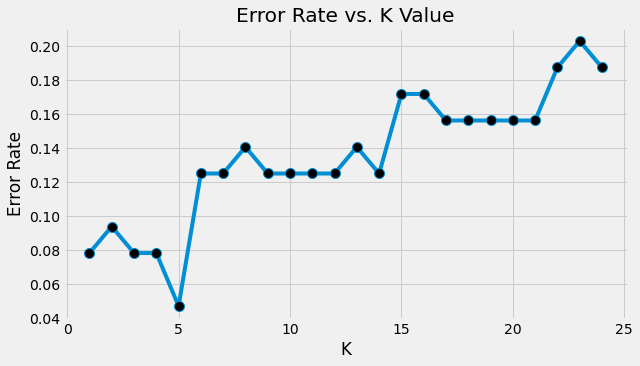

In [153]:
plt.figure(figsize=(9,5))
plt.plot(range(1,25),error_rate, marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that if the number of neighbors value increases more than 5, the error rate also increases. So we are choosing 5 as the n_neighbors value.

In [154]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scl,y_train)

KNeighborsClassifier()

In [155]:
y_test_pred = knn.predict(X_test_scl)

### Accuracy matrics of KNN

In [156]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

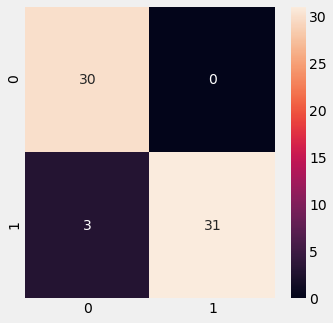

In [157]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True)

In [158]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test,y_test_pred))

0.953125
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.91      0.95        34

    accuracy                           0.95        64
   macro avg       0.95      0.96      0.95        64
weighted avg       0.96      0.95      0.95        64



# XG Boost model building

In [159]:
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XG = XGBClassifier()
#RF = RandomForestClassifier()
XG.fit(X_train, y_train)

y_test_pred2 = XG.predict(X_test)

### Accuracy matrics of XGB

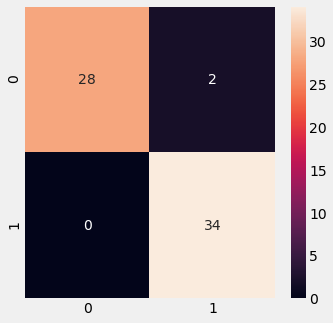

In [160]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_test,y_test_pred2), annot=True)

In [88]:
print(accuracy_score(y_test, y_test_pred2))
print(classification_report(y_test,y_test_pred2))

0.96875
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        34

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64

